Dataframe shape : (4424, 38)
['Dropout', 'Graduate', 'Enrolled']


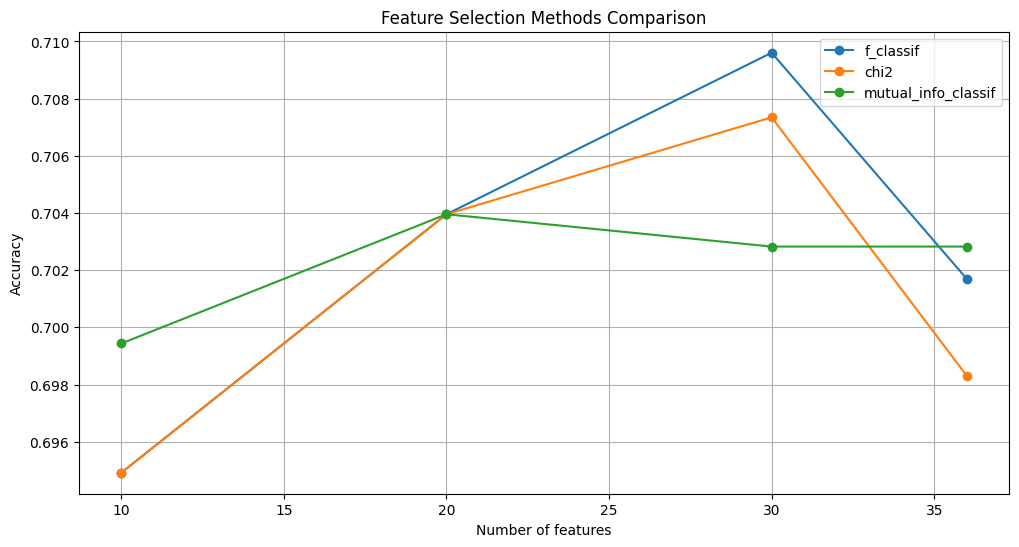

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("all_data.csv")
print(f"Dataframe shape : {df.shape}")
list_of_activity = df["Target"].unique().tolist()
print(list_of_activity)
X = df.drop(columns="Target")
y = df["Target"]

def apply_feature_selection(X, y, method, k):
    if method == chi2:
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
    
    selector = SelectKBest(method, k=k)
    X_selected = selector.fit_transform(X, y)
    
    return X_selected

def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    return accuracy_score(y_test, y_pred)

# Example usage
methods = [f_classif, chi2, mutual_info_classif]
k_values = [10, 20, 30, 36]

results = {}

for method in methods:
    method_name = method.__name__
    results[method_name] = []
    
    for k in k_values:
        X_selected = apply_feature_selection(X, y, method, k)
        accuracy = train_and_evaluate(X_selected, y)
        results[method_name].append(accuracy)

# Plotting
plt.figure(figsize=(12, 6))
for method, accuracies in results.items():
    plt.plot(k_values, accuracies, marker='o', label=method)

plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Feature Selection Methods Comparison')
plt.legend()
plt.grid(True)
plt.show()